Student Details: 

Name: **Chelliah Kanthanathan**

ID: **18263003**

# Lab 4: Comparison of Classifiers

This notebook demonstrates how to choose the best out of a few alternative classification models by applying cross-validation and comparing the accuracy of prediction, the F1-scores and the ROC curves of the classification models.

Here we use a _modified version_ of the __seeds data set__ (see https://archive.ics.uci.edu/ml/datasets/seeds), which is one of the public UCI data sets. Each example is a seed described by a few numerical attributes. The target variable for classification (in this example) is the type of the seed, which can be either 1 or 0. Class 1 are the seeds of a particular type that, we can assume, is important to learn to predict correctly, while class 0 are all other seeds.

In this example, we use 5-fold cross-validation. Empirical evidence suggests that 10 folds are probably the best choice for cross-validation, i.e. 10-fold cross-validation. However, since this data set is relatively small, and 1/10 of it is only 21 examples, it is sensible to use larger folds for testing. Thus, we demonstrate the comparison of classifiers with 5-fold cross-validation.

The code in this notebook was originally inspired by the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html.

## A. Preparation

### Import Python modules

In [171]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import cycle

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import StratifiedKFold

from scipy import interp

### Import evaluation and plotting functions

In [172]:
%run ./Lab4_Functions_18263003.ipynb

### Load and prepare the dataset for training and evaluating a classifier
Feel free to apply any other pre-processing technique at this point.

In [173]:
lab4_df = pd.read_csv("./loans_et4.csv")
lab4_df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [174]:
# target attribute
target = lab4_df['Loan_Status']

# predictor attributes
predictors = lab4_df.drop('Loan_Status', axis=1).values

# scale all predictor values to the range [0, 1]
# note the target attribute 'type' is already binary
min_max_scaler = preprocessing.MinMaxScaler()
predictors = min_max_scaler.fit_transform(predictors)

### Prepare an array of 100 equally spaced false-positive-rate values between 0 and 1
To be used as an x-axis in ROC curve plots.

In [175]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

## B. Evaluation and Comparison of Classifiers

### Train a Probablistic SVM Classifier

In [176]:
# Create an SVM classifier object as a probabilistic classifier with default parameters
SVM_classifier = svm.SVC(probability=True)

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_SVM, f1_scores_SVM, tprs_SVM, aucs_SVM, precision_SVM, recall_SVM = evaluate_classifier(folds=5, 
                                                                               p=predictors, t=target, 
                                                                               classifier=SVM_classifier, 
                                                                               mean_fpr=mean_fpr)
# runs k-fold cross validation to measure various metrics of a classifier:
#        accuracies - an array of accuracies for each fold
#        f1_scores - an array of F1-scores (also known as F-scores) for each fold
#        tprs - true positive rates, one per cross-validation fold
#        aucs - areas below the ROC curve, one per cross-validation fold

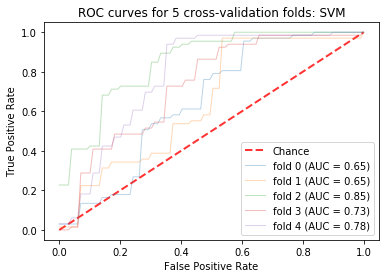

In [177]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

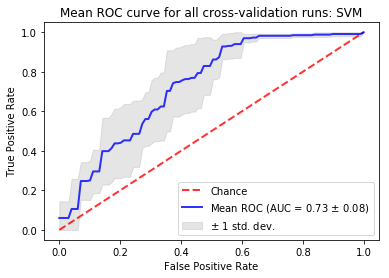

In [178]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

### Train a Naive Bayes Classifier

In [179]:
# Create a Naive Bayes classifier object with default parameters (note: Naive Bayes is a probabilistic classifier by default)
NB_classifier = GaussianNB()

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_NB, f1_scores_NB, tprs_NB, aucs_NB, precision_NB, recall_NB = evaluate_classifier(folds=5, 
                                                                         p=predictors, t=target, 
                                                                         classifier=NB_classifier, 
                                                                         mean_fpr=mean_fpr)
# runs k-fold cross validation to measure various metrics of a classifier:
#        accuracies - an array of accuracies for each fold
#        f1_scores - an array of F1-scores (also known as F-scores) for each fold
#        tprs - true positive rates, one per cross-validation fold
#        aucs - areas below the ROC curve, one per cross-validation fold

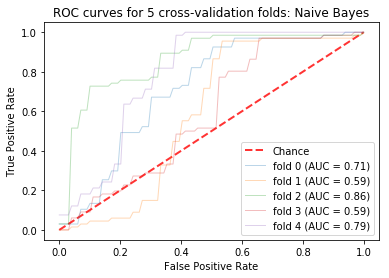

In [180]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

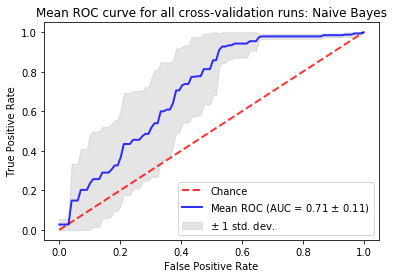

In [181]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

# Task 1 - Train another probabilistic classifier with loans_et4.csv add compare it to both SVM and Naïve Bayes.

### Train KNeighbors Classifier

In [182]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K Neighbors classifier object with default parameters
KN_classifier = KNeighborsClassifier(weights='distance')

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_KN, f1_scores_KN, tprs_KN, aucs_KN, precision_KN, recall_KN = evaluate_classifier(folds=5, 
                                                                         p=predictors, t=target, 
                                                                         classifier=KN_classifier, 
                                                                         mean_fpr=mean_fpr)
# runs k-fold cross validation to measure various metrics of a classifier:
#        accuracies - an array of accuracies for each fold
#        f1_scores - an array of F1-scores (also known as F-scores) for each fold
#        tprs - true positive rates, one per cross-validation fold
#        aucs - areas below the ROC curve, one per cross-validation fold

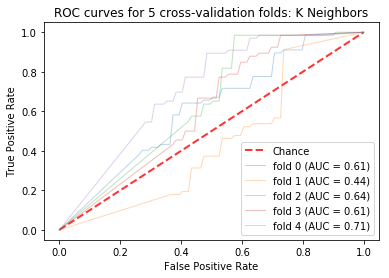

In [183]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_KN, aucs_KN, 'K Neighbors')

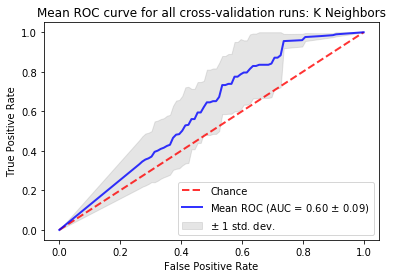

In [184]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_KN, aucs_KN, 'K Neighbors')

### Compare All Trained Classifiers

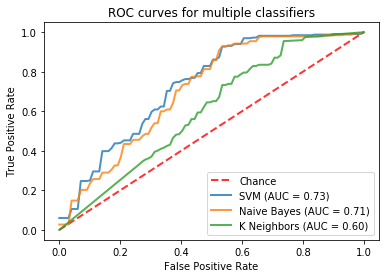

In [185]:
plot_roc_multiple_classifiers(mean_fpr, 
                              np.stack((np.mean(tprs_SVM, axis=0), np.mean(tprs_NB, axis=0), np.mean(tprs_KN, axis=0))), 
                              np.array([np.mean(aucs_SVM), np.mean(aucs_NB), np.mean(aucs_KN)]), 
                              np.array(['SVM', 'Naive Bayes','K Neighbors']))

In [186]:
# Compare the statistics of the accuracies across all cross-validation folds
accuracies_df = pd.DataFrame(data={'SVM' : accuracies_SVM, 'Naive Bayes' : accuracies_NB, 'K Neighbors' : accuracies_KN})

In [187]:
accuracies_df.describe()

,SVM,Naive Bayes,K Neighbors
count,5.000000,5.000000,5.000000
mean,0.808403,0.791670,0.673819
std,0.029567,0.053465,0.158897
min,0.778947,0.715789,0.412371
25%,0.783505,0.762887,0.649485
50%,0.812500,0.804124,0.715789
75%,0.814433,0.822917,0.778947
max,0.852632,0.852632,0.812500


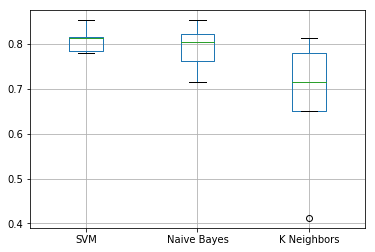

In [188]:
accuracies_df.boxplot()

In [189]:
# Compare the statistics of the F1-scores across all cross-validation folds
f1_scores_df = pd.DataFrame(data={'SVM' : f1_scores_SVM, 'Naive Bayes' : f1_scores_NB, 'K Neighbors' : f1_scores_KN})

In [190]:
f1_scores_df.describe()

,SVM,Naive Bayes,K Neighbors
count,5.000000,5.000000,5.000000
mean,0.876278,0.860583,0.754356
std,0.017193,0.036598,0.161824
min,0.860927,0.808511,0.477064
25%,0.860927,0.839161,0.753623
50%,0.878378,0.872483,0.813793
75%,0.878378,0.882759,0.848921
max,0.902778,0.900000,0.878378


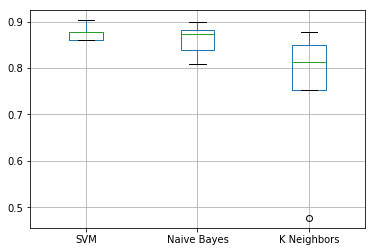

In [191]:
f1_scores_df.boxplot()

#### Conclusion

In this example, both the SVM and the Naive Bayes classifiers have mean accuracy approximately 88%, which is quite high. The ROC curves do not suggest a clear winner, although it can be noted that Naive Bayes can achieve TPR above 80% for a lower FPR than SVM. On the other hand, the accuracy of the five folds of Naive Bayes show higher variance than the accuracy of the five folds of SVM, and low variance is desirable. Still, the lowest accuracy of Naive Bayes is above 75% which is not bad. Similar observation can be made about the F1 score. Naive Bayes has a higher mean F1 score but also higher variance. Since both SVM and Naive Bayes have high mean accuracy, high mean F1 score and a very similar AUC, while SVM appears to have visibly lower variance than Naive Bayes, we can conclude that perhaps SVM is a safer choice for a best model. 

It will be interesting to plot precision and recall for a more detailed comparison. Since the two classes are not well balanced (1/3 of the examples are in class 1), a precision-recall curve a more detailed study of the precision and recall can provide better information than the ROC curves for picking the best model.

### Conclusion - comparision of SVM / Naive Bayes Vs K NeighborsClassifier

In the above Task 1 I have used K NeighborsClassifier as a third classifier to compare with SVM and Naive Bayes. The ROC curve suggests that the KN classifier has low FPR than SVM and Naive Bayes that is steady line until 0.4 threshold. The mean accuracies for KN classifier is 67% that is lesser than SVM and Naive Bayes. But the Max mean accuracies of KN classifier is 81% that is on par with SVM and Naive Bayes. The KN classifier has lower variance in F1 score analysis and again max F1 score on par with SVM and Naive Bayes. In overall the KN classifier did not outperform well when comapred to SVM. So SVM is the best model.

## C. FInal Model

Assuming KN was chosen, now we can train a final (to be potentially deployed) KN model with the whole dataset:

### Though the SVM is best model. I used KN classifier to train final model to check how it performs on unseen data.

In [192]:
model = KN_classifier.fit(predictors, target)

Use the model to predict the type of three new data:

#### First Observation - Loan Status 1, Second Observation - Loan Status 1 and Third Observation Loan status 0

In [193]:
new_data = np.array([[0,0,0,1,0,5000,2541,151,480,1,0],[1,0,0,1,1,6050,4333,120,180,1,2],[1,1,1,1,0,1538,1425,30,360,1,2]])

In [194]:
# Probabilistic prediction
np.round(model.predict_proba(new_data), 2)
# Note: 
#   - the first column are the probabilities for the three new seeds to belong to class 0
#   - the second column are the probabilities for the three new seeds to belong to class 1

array([[0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4]])

In [195]:
# Exact prediction
model.predict(new_data)

array([1, 1, 0], dtype=int64)

### Conclusion The KN classifier prediction is correct that the three data provided above has exact prediction as expected.

# Task 2 - Boxplot precision and recall for the classifiers trained with loans_et4.csv

### Statistics and Box plot for Precision score

In [196]:
precision_df = pd.DataFrame(data={'SVM' : precision_SVM, 'Naive Bayes' : precision_NB, 'K Neighbors' : precision_KN})

In [197]:
precision_df.describe()

,SVM,Naive Bayes,K Neighbors
count,5.000000,5.000000,5.000000
mean,0.793400,0.800727,0.739836
std,0.026854,0.033546,0.074437
min,0.764706,0.760000,0.619048
25%,0.773810,0.789474,0.732394
50%,0.792683,0.792683,0.746835
75%,0.802469,0.810127,0.792683
max,0.833333,0.851351,0.808219


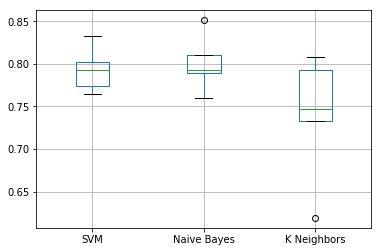

In [198]:
precision_df.boxplot()

### Statistics and Box plot for Recall score

In [199]:
recall_df = pd.DataFrame(data={'SVM' : recall_SVM, 'Naive Bayes' : recall_NB, 'K Neighbors' : recall_KN})

In [200]:
recall_df.describe()

,SVM,Naive Bayes,K Neighbors
count,5.000000,5.000000,5.000000
mean,0.978969,0.930710,0.787381
std,0.008051,0.048427,0.235206
min,0.970149,0.863636,0.388060
25%,0.970149,0.895522,0.776119
50%,0.984848,0.954545,0.893939
75%,0.984848,0.969697,0.893939
max,0.984848,0.970149,0.984848


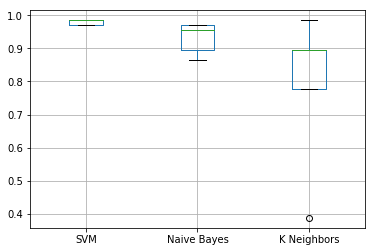

In [202]:
recall_df.boxplot()

### Conclusion - comparision of SVM / Naive Bayes Vs K NeighborsClassifier based on Precision and Recall score

The mean accuracies for KN classifier is again lesser than SVM and Naive Bayes. But the Max mean accuracies of KN classifier is also on par with SVM and Naive Bayes. The KN classifier has higher variance than other models In overall the KN classifier did not outperform well with precision and recall score when compared to SVM and Naive Bayes.

# Task 3 - Tune the parameters for the models

### SVM classifier

In [204]:
# Create an SVM classifier object as a probabilistic classifier with C = 0.6 and degree = 5 parameters
SVM_classifier = svm.SVC(C=0.6, degree=5, probability=True)

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_SVM, f1_scores_SVM, tprs_SVM, aucs_SVM, precision_SVM, recall_SVM = evaluate_classifier(folds=5, 
                                                                               p=predictors, t=target, 
                                                                               classifier=SVM_classifier, 
                                                                               mean_fpr=mean_fpr)

### Naive Bayes classifier

In [205]:
# Create a Naive Bayes classifier object with var_smoothing bit higher
NB_classifier = GaussianNB(var_smoothing=1e-12)

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_NB, f1_scores_NB, tprs_NB, aucs_NB, precision_NB, recall_NB = evaluate_classifier(folds=5, 
                                                                         p=predictors, t=target, 
                                                                         classifier=NB_classifier, 
                                                                         mean_fpr=mean_fpr)

### K Neighbours classifier

In [206]:
# Create a K neighbors classifier object with keys parameters tuned, mainly number of neighbors and algorithm
KN_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='ball_tree')

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_KN, f1_scores_KN, tprs_KN, aucs_KN, precision_KN, recall_KN = evaluate_classifier(folds=5, 
                                                                         p=predictors, t=target, 
                                                                         classifier=KN_classifier, 
                                                                         mean_fpr=mean_fpr)

### Compare models after parameter tuning

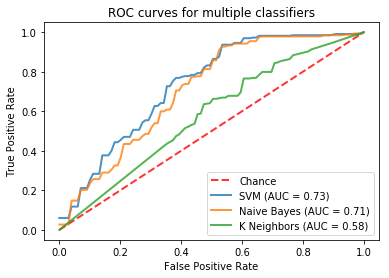

In [207]:
plot_roc_multiple_classifiers(mean_fpr, 
                              np.stack((np.mean(tprs_SVM, axis=0), np.mean(tprs_NB, axis=0), np.mean(tprs_KN, axis=0))), 
                              np.array([np.mean(aucs_SVM), np.mean(aucs_NB), np.mean(aucs_KN)]), 
                              np.array(['SVM', 'Naive Bayes','K Neighbors']))

### Conclusion After tuning parameters still the KN classifier ROC curves is lower than SVM and Naive Bayes. Perhaps the K NeighborsClassifier model does not suit for loan data sets.

### The SVM model has 10 parameters that can be tuned. Compare the SVM model with or without tuning these parameters

In [220]:
# Create an SVM classifier object as a probabilistic classifier with C = 0.9.kernel = linear and degree = 10 parameters
SVM_classifier_tuned = svm.SVC(C=0.9, kernel ='linear', degree=10, probability=True)

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_SVM_tuned, f1_scores_SVM_tuned, tprs_SVM_tuned, aucs_SVM_tuned, precision_SVM_tuned, recall_SVM_tuned = evaluate_classifier(folds=5, 
                                                                               p=predictors, t=target, 
                                                                               classifier=SVM_classifier_tuned, 
                                                                               mean_fpr=mean_fpr)

#### Compare SVM mdoels after tuning

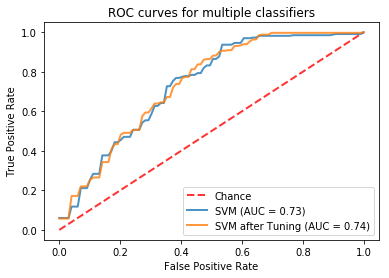

In [221]:
plot_roc_multiple_classifiers(mean_fpr, 
                              np.stack((np.mean(tprs_SVM, axis=0), np.mean(tprs_SVM_tuned, axis=0))), 
                              np.array([np.mean(aucs_SVM), np.mean(aucs_SVM_tuned)]), 
                              np.array(['SVM', 'SVM after Tuning']))

### Conclusion The false positive rates are bit better with SVM tuned. But more or less the ROC curves are same for both the models and FPR is slightly better forSVM tuned with degree 10 and C = 0.9